In [1]:
import os
pid = os.getpid()
!kill -9 $pid

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import copy

# METRICS PER MODEL

In [2]:
efficientDet0_global = {'p':0.63, 'r':0.538, 'f': 0.526}
efficientDet1_global = {'p':0.6, 'r':0.594, 'f': 0.535}

In [3]:
def plot_global_metrics(list_res):
    labels = []
    for x in range(len(list_res)):
        labels.append("efficientDet{}".format(x))
    p = [ res['p'] for res in list_res ]
    r = [ res['r'] for res in list_res ]
    f = [ res['f'] for res in list_res ]
    
    x = np.arange(len(labels))
    width = 0.2
    
    # plot data in grouped manner of bar type
    plt.bar(x-0.2, p, width, color='cyan')
    plt.bar(x, r, width, color='orange')
    plt.bar(x+0.2, f, width, color='green')
    plt.xticks(x, labels)
    plt.xlabel("Model")
    plt.ylabel("Metrics")
    plt.legend(["Precision", "Recall", "F1-score"],bbox_to_anchor = (1.05, 0.6))
    plt.title("Metrics per model")
    plt.savefig("/home/acarlier/code/OrnithoScope/data/global_metrics_per_efficientDet.jpg",bbox_inches='tight',dpi=100)   
    plt.show()


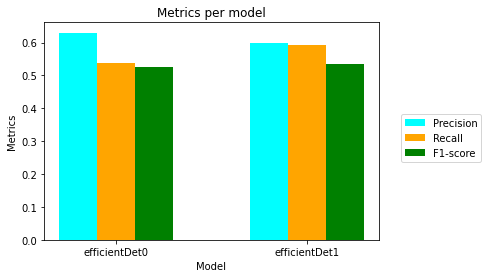

In [4]:
plot_global_metrics([efficientDet0_global,efficientDet1_global])

# METRICS PER MODEL PER CLASSES

In [7]:
class_res = [{'Precision': 0.875, 'Rappel': 0.963, 'F-score': 0.917},
 {'Precision': 0.59, 'Rappel': 0.383, 'F-score': 0.465},
 {'Precision': 0.968, 'Rappel': 0.426, 'F-score': 0.592},
 {'Precision': 0.872, 'Rappel': 0.673, 'F-score': 0.76},
 {'Precision': 0.315, 'Rappel': 0.885, 'F-score': 0.465},
 {'Precision': 0.56, 'Rappel': 0.663, 'F-score': 0.607},
 {'Precision': 0.882, 'Rappel': 0.136, 'F-score': 0.236},
 {'Precision': 0.944, 'Rappel': 0.845, 'F-score': 0.892},
 {'Precision': 0.2, 'Rappel': 0.043, 'F-score': 0.071},
 {'Precision': 0.833, 'Rappel': 0.513, 'F-score': 0.635},
 {'Precision': 0.304, 'Rappel': 0.848, 'F-score': 0.448},
 {'Precision': 0.86, 'Rappel': 0.815, 'F-score': 0.837},
 {'Precision': 0.143, 'Rappel': 0.053, 'F-score': 0.077},
 {'Precision': 0, 'Rappel': 0, 'F-score': 0},
 {'Precision': 0.476, 'Rappel': 0.286, 'F-score': 0.357},
 {'Precision': 0.0, 'Rappel': 0, 'F-score': 0}]

pickle.dump(class_res, open( "/home/acarlier/code/OrnithoScope/saved_models/class_metrics_efficientDet0.p", "wb" ) )

In [8]:
efficientDet0 = pickle.load( open( "/home/acarlier/code/OrnithoScope/saved_models/class_metrics_efficientDet0.p", "rb" ) )
efficientDet1 = pickle.load( open( "/home/acarlier/code/OrnithoScope/saved_models/class_metrics_efficientDet1.p", "rb" ) )


In [9]:
print(len(efficientDet0))
print(efficientDet0,"\n")
print(efficientDet1)

16
[{'Precision': 0.875, 'Rappel': 0.963, 'F-score': 0.917}, {'Precision': 0.59, 'Rappel': 0.383, 'F-score': 0.465}, {'Precision': 0.968, 'Rappel': 0.426, 'F-score': 0.592}, {'Precision': 0.872, 'Rappel': 0.673, 'F-score': 0.76}, {'Precision': 0.315, 'Rappel': 0.885, 'F-score': 0.465}, {'Precision': 0.56, 'Rappel': 0.663, 'F-score': 0.607}, {'Precision': 0.882, 'Rappel': 0.136, 'F-score': 0.236}, {'Precision': 0.944, 'Rappel': 0.845, 'F-score': 0.892}, {'Precision': 0.2, 'Rappel': 0.043, 'F-score': 0.071}, {'Precision': 0.833, 'Rappel': 0.513, 'F-score': 0.635}, {'Precision': 0.304, 'Rappel': 0.848, 'F-score': 0.448}, {'Precision': 0.86, 'Rappel': 0.815, 'F-score': 0.837}, {'Precision': 0.143, 'Rappel': 0.053, 'F-score': 0.077}, {'Precision': 0, 'Rappel': 0, 'F-score': 0}, {'Precision': 0.476, 'Rappel': 0.286, 'F-score': 0.357}, {'Precision': 0.0, 'Rappel': 0, 'F-score': 0}] 

[{'Precision': 0.896, 'Rappel': 0.968, 'F-score': 0.931}, {'Precision': 0.802, 'Rappel': 0.543, 'F-score': 0.6

In [10]:
classes = ['MESCHA', 'SITTOR', 'MESBLE', 'MESNON', 'PINARB', 'ACCMOU', 'ROUGOR', 'VEREUR', 'MOIDOM', 'TOUTUR', 'ECUROU', 'PIEBAV', 'MULGRI', 'CAMPAG', 'MESNOI', 'MESHUP']
len(classes)

16

In [11]:
def plot_class_metrics_per_efficientDet(list_of_metrics_per_efficientDet, list_of_classes):

    for efficientDet_metrics in list_of_metrics_per_efficientDet:
        i = 0
        l = 1
        fig, axs = plt.subplots(len(list_of_classes),len(list_of_metrics_per_efficientDet),figsize=(15,15))

        for res in efficientDet_metrics:
            class_name = list_of_classes[i]
            vnames = [name for name in globals() if globals()[name] is efficientDet_metrics]
            ax1 = plt.subplot(4, 4, l)
            names = list(res.keys())
            values = list(res.values())
            plt.bar(range(len(res)), values, tick_label=names)
            ax1.set_ylim([0, 1])
            l += 1
            plt.title(vnames[0])
            i +=1

    #plt.savefig("/home/acarlier/code/OrnithoScope/data/class_metrics_per_efficientDet.jpg",bbox_inches='tight',dpi=100)

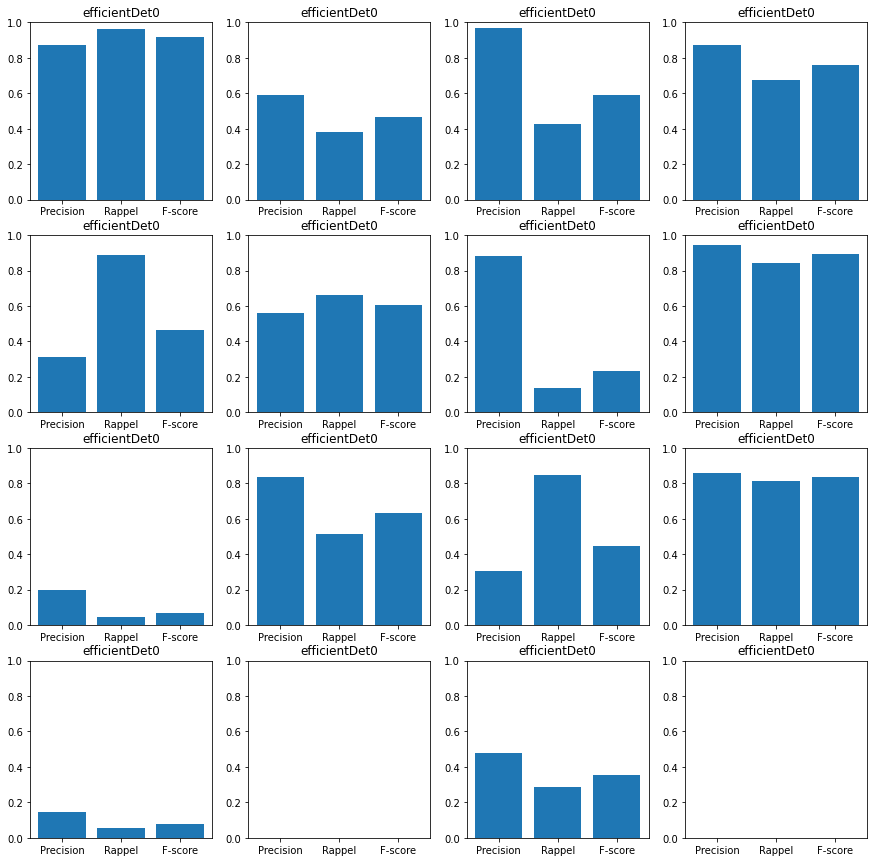

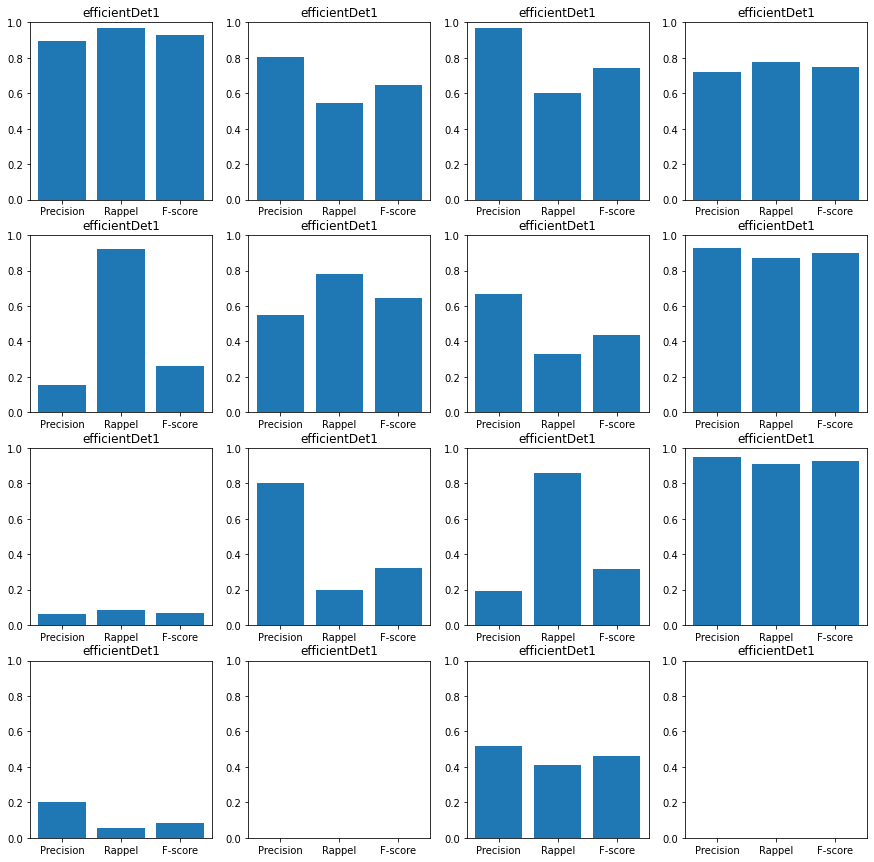

In [12]:
plot_class_metrics_per_efficientDet([efficientDet0,efficientDet1], classes)

In [13]:
def plot_class_metrics_per_class_and_efficientDet(list_of_metrics_per_efficientDet, list_of_classes):
    X = list_of_classes
    Y1 = list_of_metrics_per_efficientDet[0][0].values()
    Y2 = list_of_metrics_per_efficientDet[0][0].values()
    
    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, Y1, 0.4, label = 'EfficientDet0')
    plt.bar(X_axis + 0.2, Y2, 0.4, label = 'EfficientDet1')
    
    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    #plt.ylabel("Number of Students")
    plt.title("Metrics per class per model")
    plt.legend()
    plt.show()

In [14]:
def plot_test(list_of_metrics_per_efficientDet, list_of_classes):
    labels = []
    for x in range(len(list_of_metrics_per_efficientDet)):
        labels.append("efficientDet{}".format(x))
    print(labels)
    p_per_efficientDet = []
    r_per_efficientDet = []
    f_per_efficientDet = []
    for model in list_of_metrics_per_efficientDet:
        for metrics in model:
            p_per_efficientDet.append(metrics['Precision'])
            r_per_efficientDet.append(metrics['Rappel'])
            f_per_efficientDet.append(metrics['F-score'])
    print(len(p_per_efficientDet), len(r_per_efficientDet), len(f_per_efficientDet))
    print('data imported')
    x = np.arange(len(p_per_efficientDet))
    width = 0.2
    
    # plot data in grouped manner of bar type
    plt.bar(x-0.2, p_per_efficientDet, width, color='cyan')
    plt.bar(x, r_per_efficientDet, width, color='orange')
    plt.bar(x+0.2, f_per_efficientDet, width, color='green')
    #plt.xticks(x, labels)
    plt.xlabel("Model")
    plt.ylabel("Metrics")
    plt.legend(["Precision", "Recall", "F1-score"],bbox_to_anchor = (1.05, 0.6))
    plt.title("Metrics per model")
    #plt.savefig("/home/acarlier/code/OrnithoScope/data/metrics_per_classes_per_model.jpg",bbox_inches='tight',dpi=100)   
    plt.show()

In [15]:
def setup_df_for_metrics_per_classes(efficientDet,list_of_classes,model_efficientDet):
    efficientDet = copy.deepcopy(efficientDet)
    df = pd.DataFrame(efficientDet,
                       columns=['class', 'Precision', 'Rappel', 'F-score'])
    df['class'] = list_of_classes
    df['efficientDet'] = int(model_efficientDet)
    return df

In [16]:
setup_df_for_metrics_per_classes(efficientDet0,classes,0)

,class,Precision,Rappel,F-score,efficientDet
0,MESCHA,0.875,0.963,0.917,0
1,SITTOR,0.590,0.383,0.465,0
2,MESBLE,0.968,0.426,0.592,0
3,MESNON,0.872,0.673,0.760,0
4,PINARB,0.315,0.885,0.465,0
5,ACCMOU,0.560,0.663,0.607,0
6,ROUGOR,0.882,0.136,0.236,0
7,VEREUR,0.944,0.845,0.892,0
8,MOIDOM,0.200,0.043,0.071,0
9,TOUTUR,0.833,0.513,0.635,0


In [17]:
setup_df_for_metrics_per_classes(efficientDet1,classes,1)

,class,Precision,Rappel,F-score,efficientDet
0,MESCHA,0.896,0.968,0.931,1
1,SITTOR,0.802,0.543,0.647,1
2,MESBLE,0.967,0.602,0.742,1
3,MESNON,0.720,0.777,0.748,1
4,PINARB,0.153,0.923,0.262,1
5,ACCMOU,0.550,0.783,0.646,1
6,ROUGOR,0.667,0.327,0.439,1
7,VEREUR,0.927,0.870,0.897,1
8,MOIDOM,0.061,0.087,0.071,1
9,TOUTUR,0.800,0.200,0.320,1


In [18]:
def create_concat_df(list_efficientDet_results,list_of_classes):
    frames = []
    i = 0
    for efficientDet in list_efficientDet_results:
        df = setup_df_for_metrics_per_classes(efficientDet,list_of_classes, i)
        frames.append(df) 
        i += 1  
    result = pd.concat(frames)
    result = result.sort_values(by=['class'])
    return result

In [19]:
create_concat_df([efficientDet0,efficientDet1], classes)

,class,Precision,Rappel,F-score,efficientDet
5,ACCMOU,0.550,0.783,0.646,1
5,ACCMOU,0.560,0.663,0.607,0
13,CAMPAG,0.000,0.000,0.000,1
13,CAMPAG,0.000,0.000,0.000,0
10,ECUROU,0.192,0.857,0.314,1
10,ECUROU,0.304,0.848,0.448,0
2,MESBLE,0.968,0.426,0.592,0
2,MESBLE,0.967,0.602,0.742,1
0,MESCHA,0.875,0.963,0.917,0
0,MESCHA,0.896,0.968,0.931,1


In [22]:
def plot_test2(list_of_metrics_per_efficientDet, list_of_classes):
    df = create_concat_df(list_of_metrics_per_efficientDet,list_of_classes)    
    # plot grouped bar chart
    df.plot(x='class',
            y = ["Precision","Rappel","F-score"],
            kind='bar',
            stacked=False,
            title='Precision Recall and F1-score per classes per efficientDet',
            ylim=[0, 1],
            figsize=(30,15))
    plt.savefig("/home/acarlier/code/OrnithoScope/data/prf1_per_class_per_efficientDet.jpg",bbox_inches='tight',dpi=100)

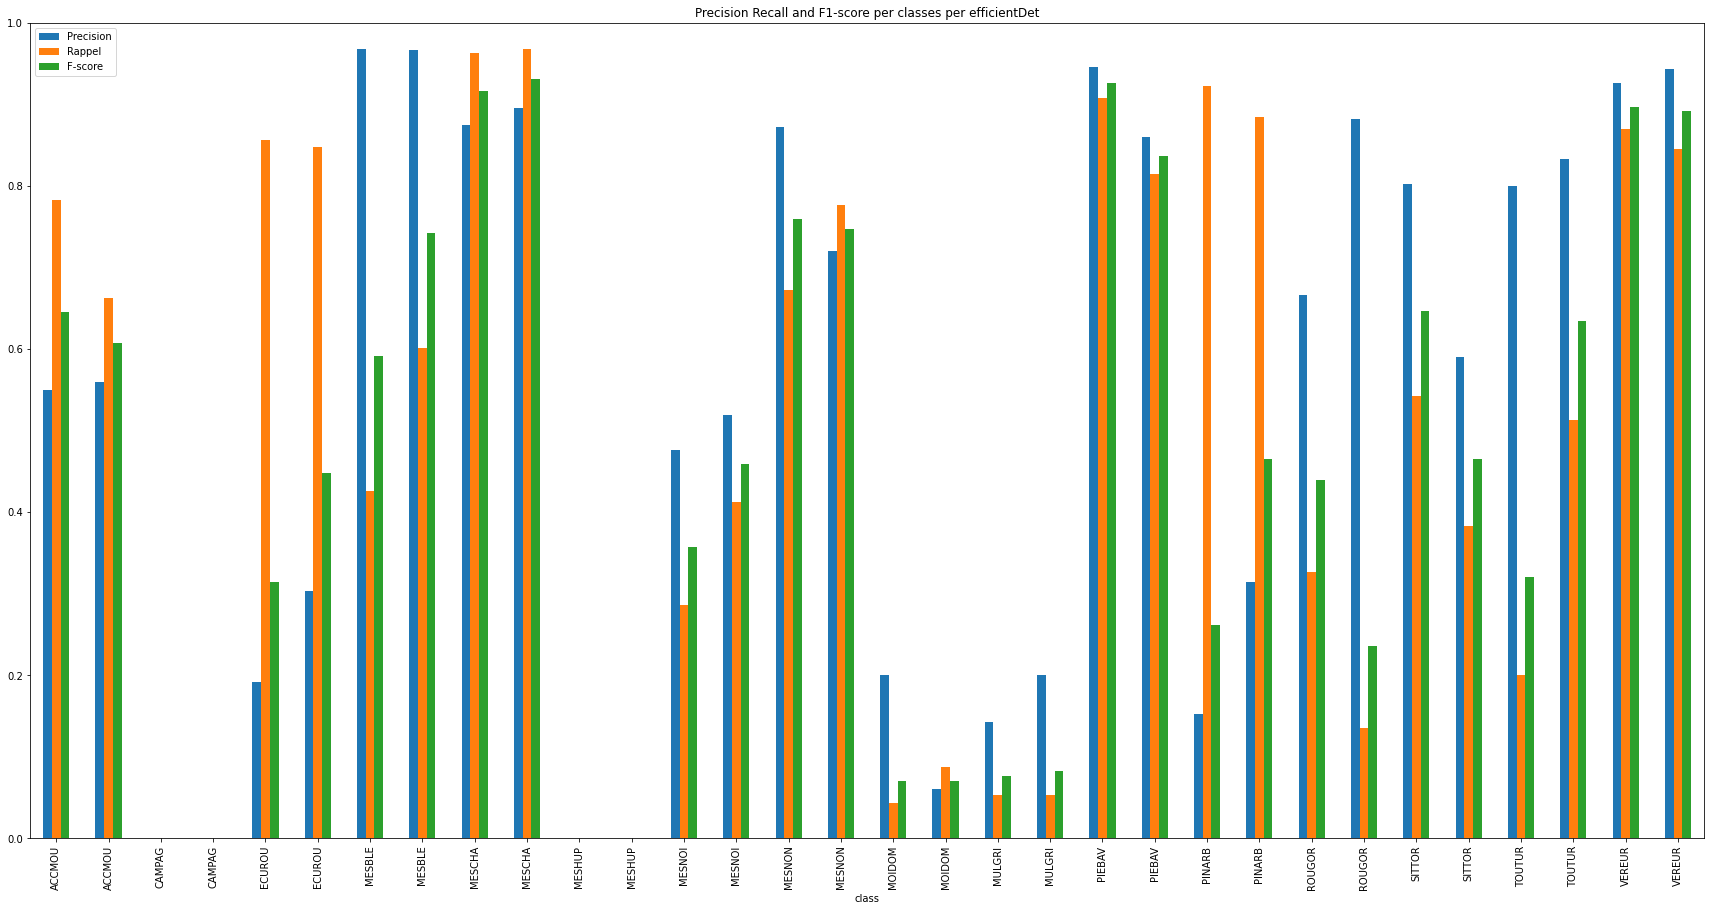

In [23]:
#plot_test([efficientDet0,efficientDet1], classes)
plot_test2([efficientDet0,efficientDet1], classes)

In [45]:
import seaborn as sns

def plot_test3(list_of_metrics_per_efficientDet,list_of_classes, y_tested):
    df = create_concat_df(list_of_metrics_per_efficientDet,list_of_classes)    
    
    # Now convert this dictionary type data into a pandas dataframe
    # specifying what are the column names

    # Defining the plot size
    plt.figure(figsize=(30, 15))
    
    # Defining the values for x-axis, y-axis
    # and from which dataframe the values are to be picked
    plots = sns.barplot(x="class", y =y_tested, hue="efficientDet", data=df)
    
    # Iterrating over the bars one-by-one
    for bar in plots.patches:
    
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
        plots.annotate(format(bar.get_height(), '.2f'),
                        (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')
    
    # Setting the label for x-axis
    plt.xlabel("Class", size=14)
    
    # Setting the label for y-axis
    plt.ylabel(f"{y_tested}", size=14)
    
    # Setting the title for the graph
    plt.title(f"{y_tested} per class per efficientDet")
    plt.savefig(f"/home/acarlier/code/OrnithoScope/data/{y_tested}_per_class_per_efficientDet.jpg",bbox_inches='tight',dpi=100)
    # Finally showing the plot
    plt.show()


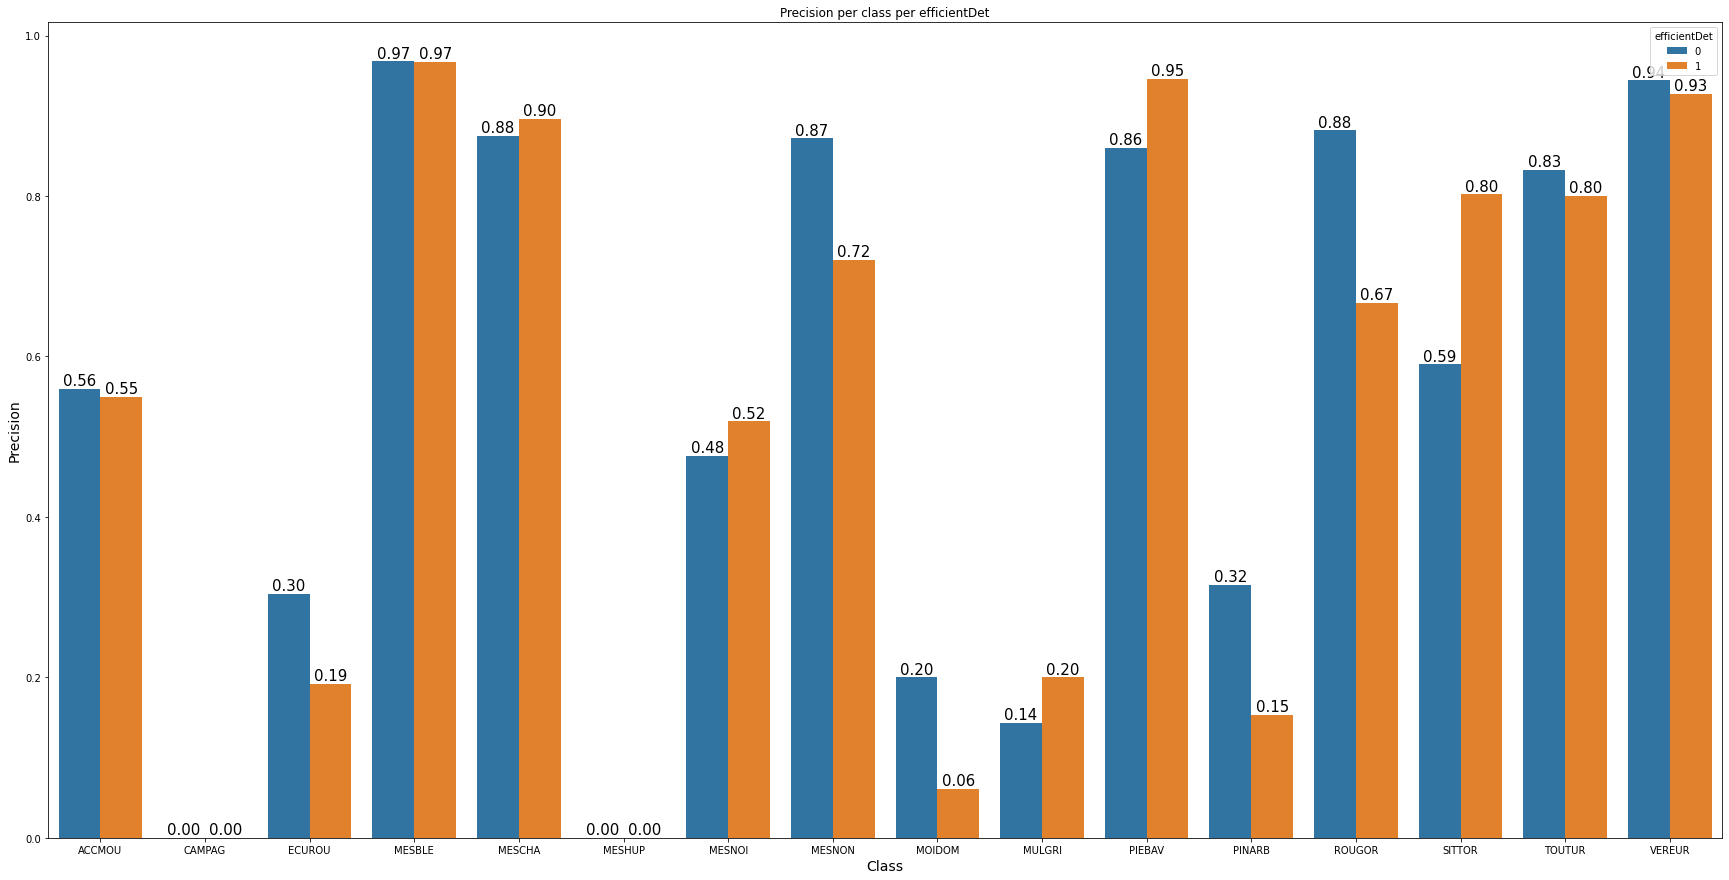

In [46]:
plot_test3([efficientDet0,efficientDet1],classes,"Precision")

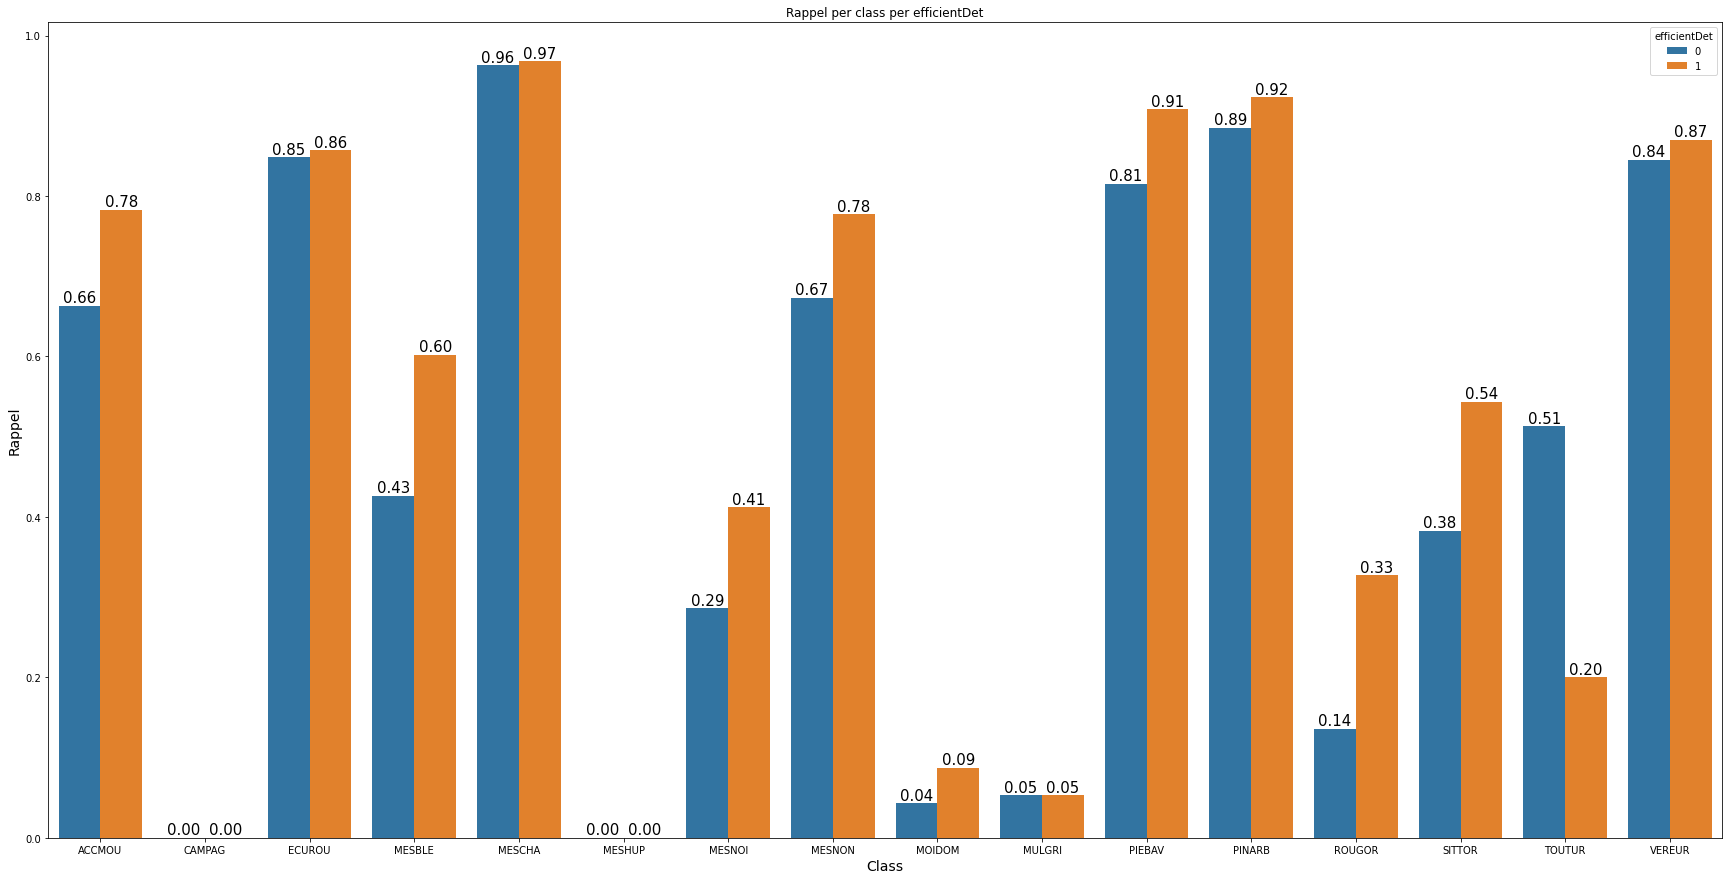

In [47]:
plot_test3([efficientDet0,efficientDet1],classes,"Rappel")

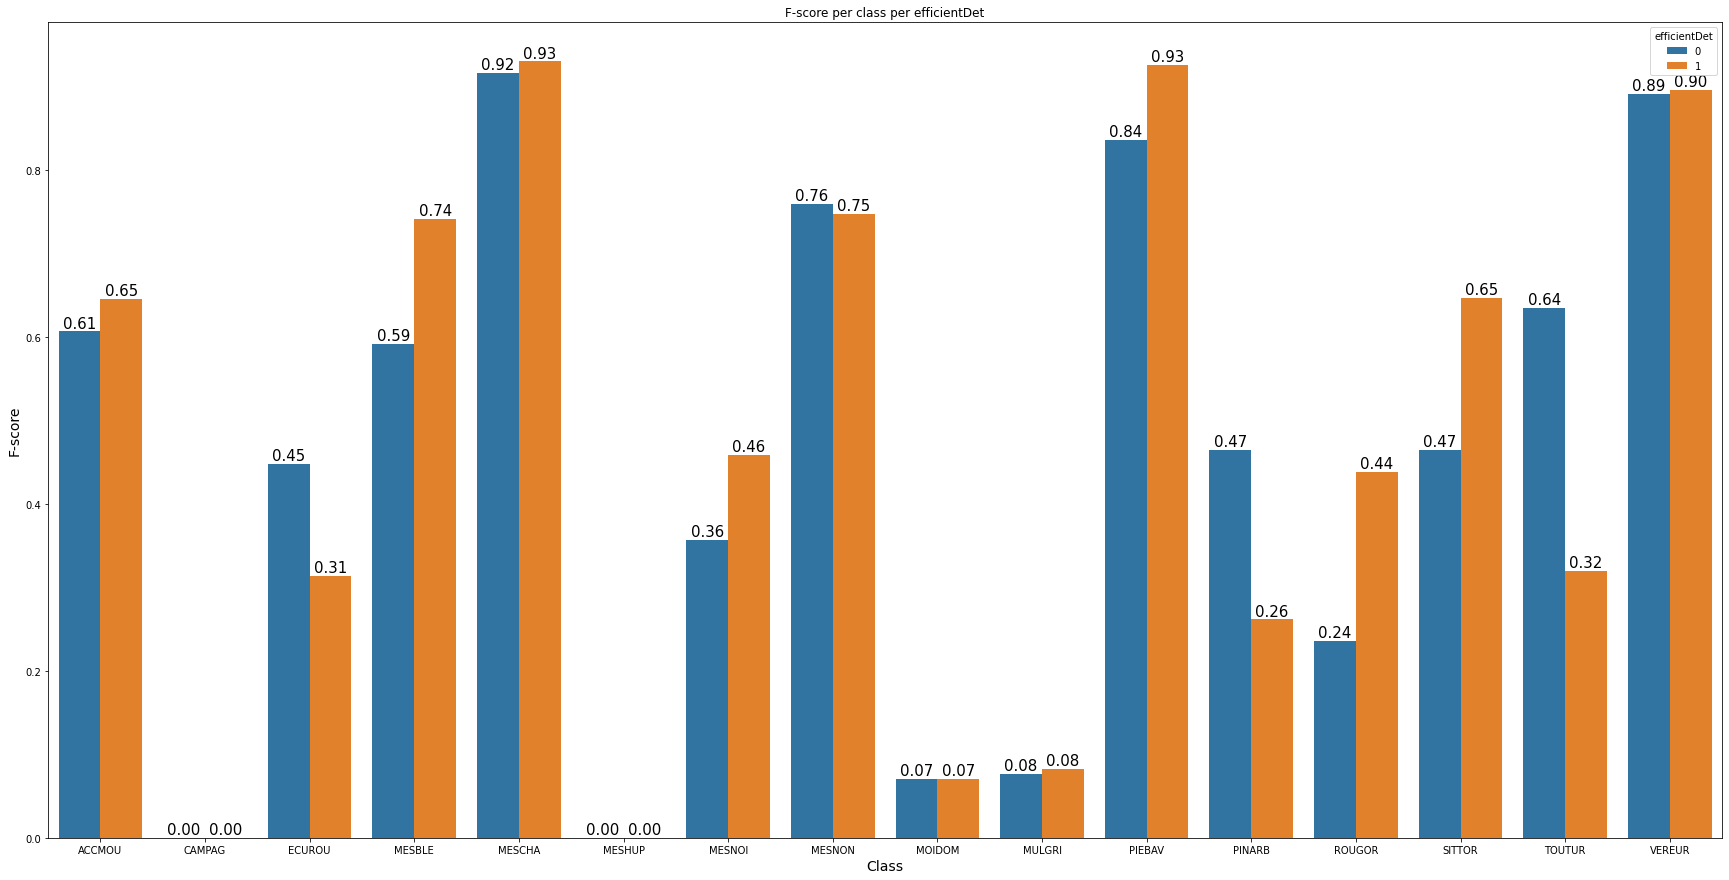

In [48]:
plot_test3([efficientDet0,efficientDet1],classes,"F-score")